In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from category_encoders.leave_one_out import LeaveOneOutEncoder
pd.set_option('future.no_silent_downcasting', True)
from sklearn.metrics import classification_report

In [37]:
data = pd.read_csv('crx.data', names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'], delimiter=',', na_values='?')
data = data.dropna()
data['A16'] = data['A16'].replace('+', 1)
data['A16'] = data['A16'].replace('-', 0)
data['A16'] = data['A16'].astype('int8')
enc = LeaveOneOutEncoder(cols=data[['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']])
data = enc.fit_transform(data, data['A16'])
data = data.drop(columns='A5')
data.head(10)

,A1,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,0.445434,30.83,0.000,0.497992,0.516129,0.426316,1.250,0.795977,0.706294,1,0.428571,0.467337,202.0,0,1
1,0.465347,58.67,4.460,0.497992,0.648649,0.632353,3.040,0.795977,0.706294,6,0.428571,0.467337,43.0,560,1
2,0.465347,24.50,0.500,0.497992,0.648649,0.632353,1.500,0.795977,0.252055,0,0.428571,0.467337,280.0,824,1
3,0.445434,27.83,1.540,0.497992,0.516129,0.426316,3.750,0.795977,0.706294,5,0.478405,0.467337,100.0,3,1
4,0.445434,20.17,5.625,0.497992,0.516129,0.426316,1.710,0.795977,0.252055,0,0.428571,0.269231,120.0,0,1
5,0.445434,32.08,4.000,0.497992,0.405405,0.426316,2.500,0.795977,0.252055,0,0.478405,0.467337,360.0,0,1
6,0.445434,33.17,1.040,0.497992,0.500000,0.632353,6.500,0.795977,0.252055,0,0.478405,0.467337,164.0,31285,1
7,0.465347,22.92,11.585,0.497992,0.717949,0.426316,0.040,0.795977,0.252055,0,0.428571,0.467337,80.0,1349,1
8,0.445434,54.42,0.500,0.291391,0.255319,0.632353,3.960,0.795977,0.252055,0,0.428571,0.467337,180.0,314,1
9,0.445434,42.50,4.915,0.291391,0.516129,0.426316,3.165,0.795977,0.252055,0,0.478405,0.467337,52.0,1442,1


In [38]:
scaler = MinMaxScaler()
data_sc = scaler.fit_transform(data.drop(columns=['A16']))
X_train, X_test, y_train, y_test = train_test_split(data_sc, data.A16, train_size=.66, random_state=17, shuffle=True)

In [39]:
knn_cl = KNeighborsClassifier(n_neighbors=5)
cv_sc = cross_val_score(knn_cl, X_train, y_train, cv=4)
print(f"Cross-Validation Scores: {cv_sc}")

Cross-Validation Scores: [0.80555556 0.82407407 0.85046729 0.90654206]


In [40]:
knn_cl.fit(X_train, y_train)

print(f'Train Score: {knn_cl.score(X_train, y_train)}')
print(f'Test Score: {knn_cl.score(X_test, y_test)}')

Train Score: 0.8976744186046511
Test Score: 0.8923766816143498


In [42]:
y_pred = knn_cl.predict(X_test)
print(classification_report(y_test, y_pred, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.91      0.89      0.90       118
     class_1       0.88      0.90      0.89       105

    accuracy                           0.89       223
   macro avg       0.89      0.89      0.89       223
weighted avg       0.89      0.89      0.89       223



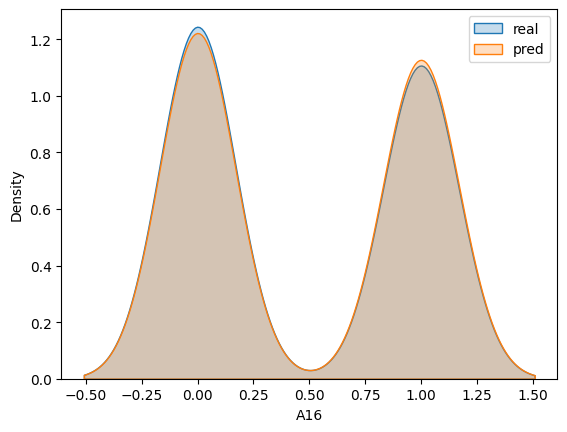

In [43]:
sns.kdeplot(y_test, fill=True, label='real')
sns.kdeplot(knn_cl.predict(X_test), fill=True, label='pred')
plt.legend()

**Модель має схожі результати з логістичною регресією, теж гірше за дерево.**